In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from top2vec import Top2Vec

In [38]:
# Load the data
df = pd.read_json("jumiascraper/new_reviews.json")
df.head()

,product,header,review,date_reviewed
0,Garnier Pure Active 3 In1 Charcoal Anti Blac...,my face tone has improved after 3 weeks of usage,I would recommend this product to anyone that ...,21-07-2024
1,Garnier Pure Active 3 In1 Charcoal Anti Blac...,Amazing,Works as described\n,19-07-2024
2,Garnier Pure Active 3 In1 Charcoal Anti Blac...,Good,Work for me,15-07-2024
3,Garnier Pure Active 3 In1 Charcoal Anti Blac...,its nice though a little.bit.itchy,Increase the quantity,12-07-2024
4,Garnier Pure Active 3 In1 Charcoal Anti Blac...,awesome,It understands the assignment ☺️,12-07-2024


In [39]:
# drop missing values
df.dropna(inplace=True)

In [40]:
# Basic Feature Engineering
df["full_review"] = df["header"] + " " + df["review"] # Combine
df.drop(columns=["header", "review", "date_reviewed"], inplace=True) # drop
df.rename({"full_review": "review"}, axis=1, inplace=True) # rename

In [41]:
# View to verify above changes
df.head()

,product,review
0,Garnier Pure Active 3 In1 Charcoal Anti Blac...,my face tone has improved after 3 weeks of usa...
1,Garnier Pure Active 3 In1 Charcoal Anti Blac...,Amazing Works as described\n
2,Garnier Pure Active 3 In1 Charcoal Anti Blac...,Good Work for me
3,Garnier Pure Active 3 In1 Charcoal Anti Blac...,its nice though a little.bit.itchy Increase th...
4,Garnier Pure Active 3 In1 Charcoal Anti Blac...,awesome It understands the assignment ☺️


In [42]:
#Create list of all reviews
reviews = df["review"].tolist()

In [55]:
model = Top2Vec(reviews, embedding_model="all-MiniLM-L6-v2", speed="deep-learn")

2024-08-02 00:01:24,616 - top2vec - INFO - Pre-processing documents for training
/home/daniel/anaconda3/envs/cuda-env/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-08-02 00:01:24,774 - top2vec - INFO - Downloading all-MiniLM-L6-v2 model
2024-08-02 00:01:30,513 - top2vec - INFO - Creating joint document/word embedding
2024-08-02 00:01:34,779 - top2vec - INFO - Creating lower dimension embedding of documents
2024-08-02 00:01:40,468 - top2vec - INFO - Finding dense areas of documents
2024-08-02 00:01:40,581 - top2vec - INFO - Finding topics


In [67]:
model.get_num_topics()

74

In [70]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [71]:
topic_sizes

array([276, 250, 207, 181, 179, 170, 147, 145, 141, 140, 125, 121, 120,
       118, 117, 116, 114, 113, 112, 112, 108, 104, 100,  98,  88,  85,
        82,  79,  78,  77,  75,  74,  73,  69,  69,  68,  66,  65,  61,
        60,  59,  58,  56,  56,  55,  53,  53,  52,  50,  49,  48,  47,
        47,  47,  45,  44,  44,  40,  39,  39,  38,  37,  37,  37,  36,
        34,  32,  32,  31,  29,  28,  27,  25,  22])

In [72]:
topic_nums

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73])

In [73]:
model.topic_words

array([['skin', 'acne', 'sunscreen', ..., 'loved', 'very', 'always'],
       ['scent', 'smell', 'smells', ..., 'feels', 'makes', 'delivered'],
       ['mask', 'makeup', 'skin', ..., 'very', 'review', 'highly'],
       ...,
       ['bottle', 'sunscreen', 'hydrating', ..., 'garnier', 'make',
        'use'],
       ['jumia', 'delivered', 'delivery', ..., 'highly', 'skin', 'works'],
       ['magic', 'work', 'love', ..., 'smooth', 'feels', 'makeup']],
      dtype='<U10')

In [75]:
model.topic_words[:3]

array([['skin', 'acne', 'sunscreen', 'serum', 'cleanser', 'makeup',
        'recommend', 'product', 'cleansing', 'effective', 'best',
        'amazing', 'scent', 'products', 'face', 'vitamin', 'mask',
        'gentle', 'results', 'excellent', 'smooth', 'micellar', 'glow',
        'oily', 'advertised', 'use', 'great', 'hydrating', 'dry',
        'matte', 'spots', 'works', 'soft', 'using', 'bottle', 'what',
        'awesome', 'nice', 'worked', 'quality', 'does', 'liked',
        'glowing', 'sensitive', 'review', 'its', 'better', 'loved',
        'very', 'always'],
       ['scent', 'smell', 'smells', 'fresh', 'cleansing', 'oily',
        'cleanser', 'dry', 'best', 'acne', 'gentle', 'leaves', 'very',
        'recommend', 'quality', 'clean', 'bottle', 'effective', 'makeup',
        'skin', 'love', 'product', 'amazing', 'sunscreen', 'wash',
        'liked', 'you', 'hydrating', 'products', 'advertised', 'great',
        'excellent', 'smooth', 'glowing', 'glow', 'loved', 'always',
        'cha

In [81]:
topic_words, word_scores, topic_nums = model.get_topics(1)


In [83]:
topic_words

array([['skin', 'acne', 'sunscreen', 'serum', 'cleanser', 'makeup',
        'recommend', 'product', 'cleansing', 'effective', 'best',
        'amazing', 'scent', 'products', 'face', 'vitamin', 'mask',
        'gentle', 'results', 'excellent', 'smooth', 'micellar', 'glow',
        'oily', 'advertised', 'use', 'great', 'hydrating', 'dry',
        'matte', 'spots', 'works', 'soft', 'using', 'bottle', 'what',
        'awesome', 'nice', 'worked', 'quality', 'does', 'liked',
        'glowing', 'sensitive', 'review', 'its', 'better', 'loved',
        'very', 'always']], dtype='<U10')

In [84]:
word_scores

array([[0.5943732 , 0.45052934, 0.42189065, 0.35941702, 0.35192117,
        0.34533823, 0.33582252, 0.31497955, 0.30379453, 0.2931841 ,
        0.29306334, 0.2757983 , 0.2750178 , 0.2707485 , 0.26665223,
        0.2657626 , 0.25607944, 0.2505571 , 0.24440745, 0.243047  ,
        0.24077606, 0.23974143, 0.23817798, 0.2378445 , 0.2345371 ,
        0.23445985, 0.23232529, 0.22804773, 0.22597845, 0.22520402,
        0.2251474 , 0.22230355, 0.21774283, 0.21728645, 0.21669737,
        0.21605834, 0.2133669 , 0.21241432, 0.21118876, 0.20915556,
        0.20348415, 0.2034418 , 0.20205313, 0.20027688, 0.19726856,
        0.19140416, 0.18621904, 0.18458705, 0.18297578, 0.1820111 ]],
      dtype=float32)

In [85]:
topic_nums

array([0])

In [89]:
topic_words, word_scores, topic_nums = model.get_topics(5)
for word, scores, num in zip(topic_words, word_scores, topic_nums):
    print(f"Topic number {num}")
    print(f"Words {word}")
    print(f"\n")

Topic number 0
Words ['skin' 'acne' 'sunscreen' 'serum' 'cleanser' 'makeup' 'recommend'
 'product' 'cleansing' 'effective' 'best' 'amazing' 'scent' 'products'
 'face' 'vitamin' 'mask' 'gentle' 'results' 'excellent' 'smooth'
 'micellar' 'glow' 'oily' 'advertised' 'use' 'great' 'hydrating' 'dry'
 'matte' 'spots' 'works' 'soft' 'using' 'bottle' 'what' 'awesome' 'nice'
 'worked' 'quality' 'does' 'liked' 'glowing' 'sensitive' 'review' 'its'
 'better' 'loved' 'very' 'always']


Topic number 1
Words ['scent' 'smell' 'smells' 'fresh' 'cleansing' 'oily' 'cleanser' 'dry'
 'best' 'acne' 'gentle' 'leaves' 'very' 'recommend' 'quality' 'clean'
 'bottle' 'effective' 'makeup' 'skin' 'love' 'product' 'amazing'
 'sunscreen' 'wash' 'liked' 'you' 'hydrating' 'products' 'advertised'
 'great' 'excellent' 'smooth' 'glowing' 'glow' 'loved' 'always' 'charcoal'
 'good' 'feeling' 'review' 'ordered' 'bad' 'soft' 'what' 'highly'
 'perfectly' 'feels' 'makes' 'delivered']


Topic number 2
Words ['mask' 'makeup' 'ski

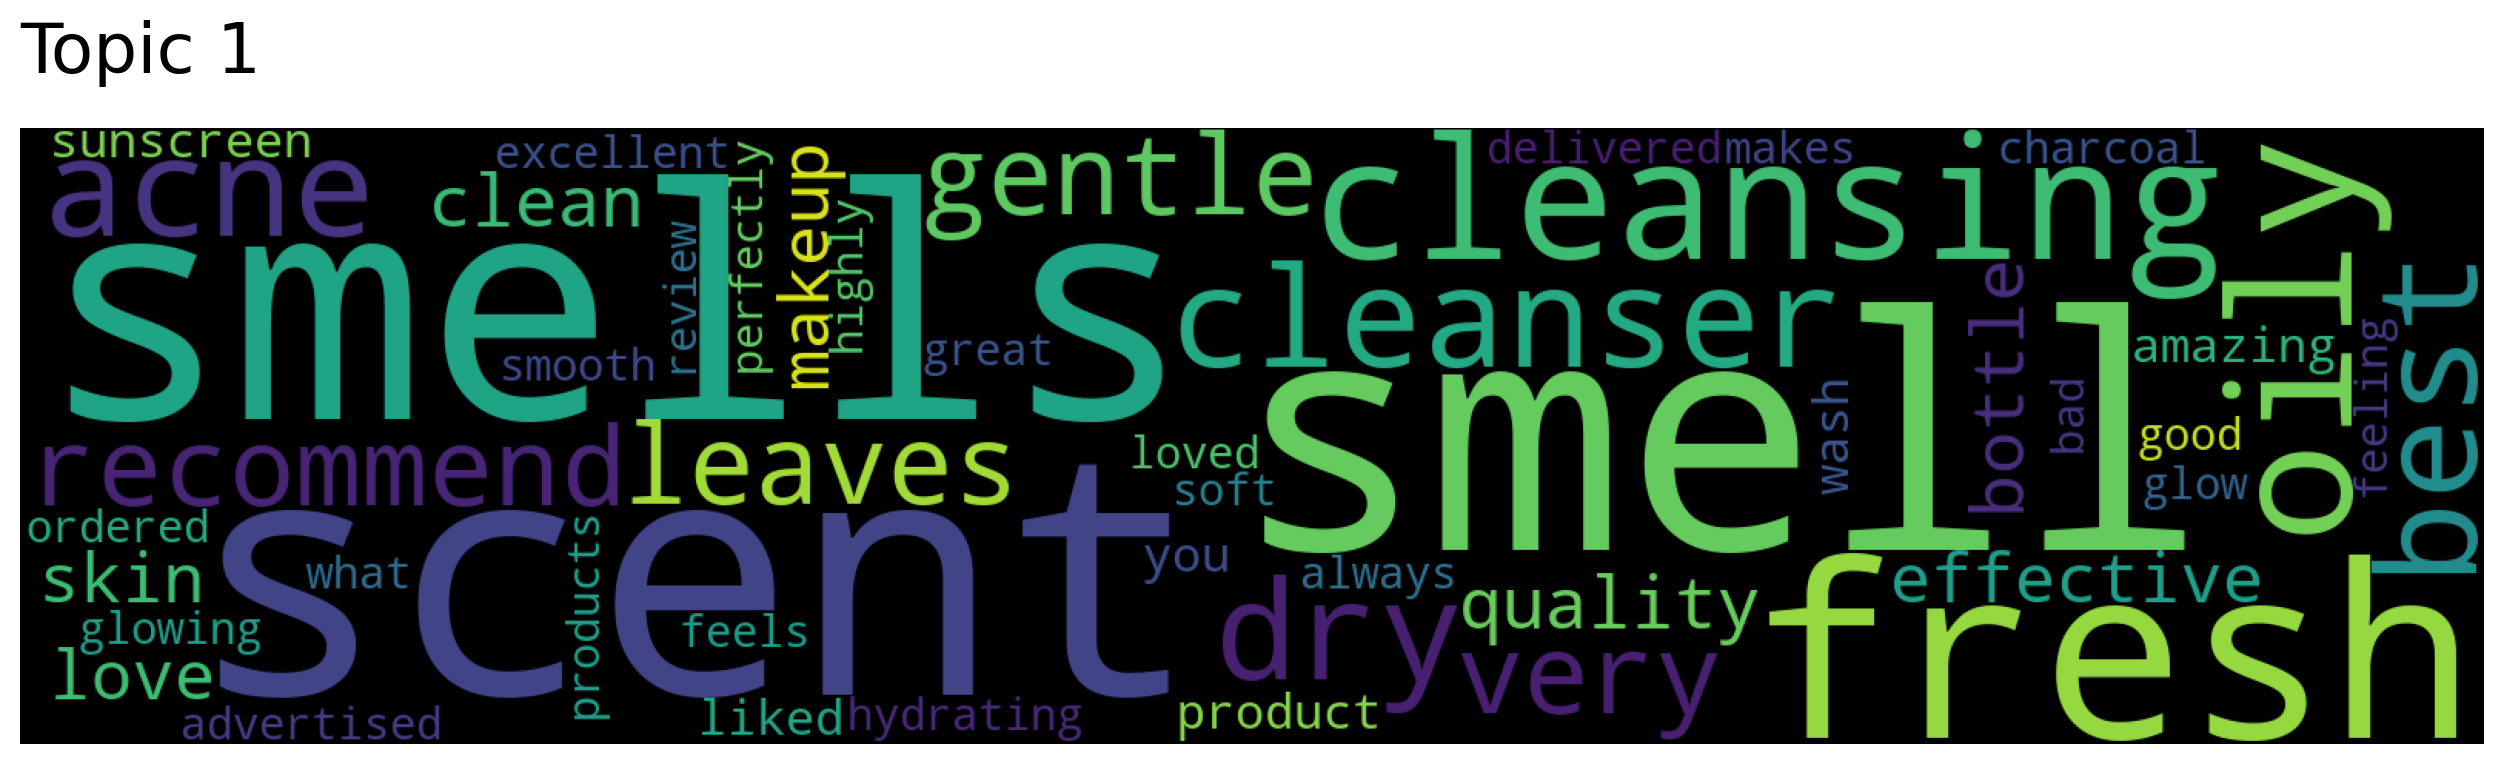

In [91]:
model.generate_topic_wordcloud(1)

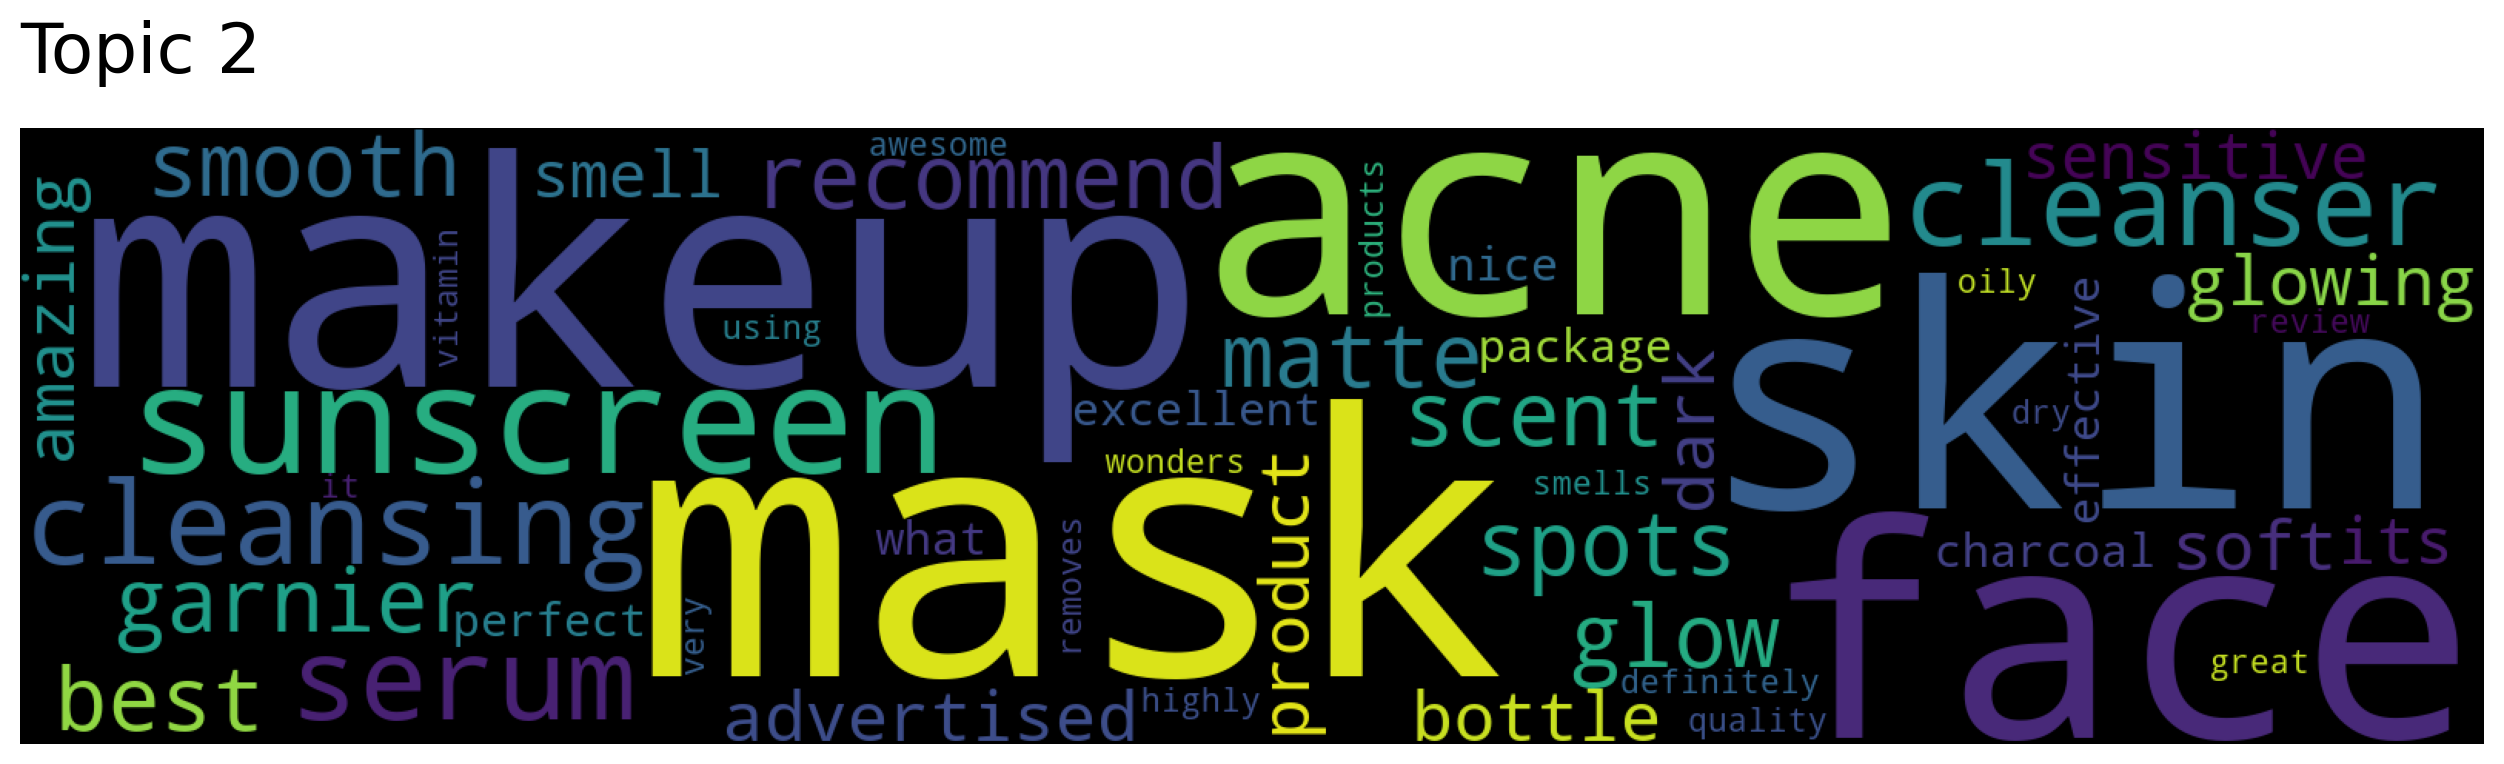

In [92]:
model.generate_topic_wordcloud(2)

In [94]:
len(model.topic_vectors)

74

In [102]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["quantity"], num_topics=3)

In [104]:
topic_words, topic_scores

([array(['quantity', 'products', 'product', 'bottle', 'quality', 'small',
         'packaging', 'make', 'much', 'worth', 'little', 'vitamin',
         'advertised', 'serum', 'more', 'tube', 'package', 'makes',
         'results', 'price', 'ordered', 'buy', 'perfect', 'water', 'very',
         'its', 'scent', 'dry', 'of', 'than', 'money', 'only', 'charcoal',
         'delivery', 'spots', 'is', 'makeup', 'delivered', 'review', 'just',
         'oily', 'smooth', 'hydrating', 'ok', 'okay', 'smells', 'soft',
         'worked', 'expected', 'bad'], dtype='<U10'),
  array(['quality', 'smooth', 'best', 'review', 'makes', 'very',
         'perfectly', 'effective', 'excellent', 'worth', 'packaging',
         'recommend', 'product', 'highly', 'quantity', 'products', 'fresh',
         'amazing', 'great', 'clean', 'liked', 'ordered', 'make', 'perfect',
         'better', 'good', 'results', 'advertised', 'bad', 'wonders', 'is',
         'price', 'magic', 'delivered', 'of', 'matte', 'use', 'dry',
    

In [120]:
# Search for Documents by topic
documents, documents_scores, documents_ids = model.search_documents_by_topic(topic_num=1, num_docs=250)

In [128]:
number_one_topic = documents

In [157]:
from wordcloud import WordCloud
from collections import Counter
import spacy

nlp = spacy.load("en_core_web_lg")


topic_words = [token.text for token in nlp(" ".join(number_one_topic))]
word_freq = Counter(topic_words)


wc = WordCloud(background_color="black").generate_from_frequencies(word_freq)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

ValueError: anchor not supported for multiline text

"i like it smells great i like it so far so good very nice smell i love it smells so good  i like it it smells great smells great i love it i like it smells amazing i love the smell its a very good product nice smells so good and is great with my skin i love it . it smell good and last longer thank you jumia i love it  it's smell so good and lasts the whole day. i love it smells amazing i love it smells nice last long amazing scent smells so good and is skin friendly i like it so far so good and smells great.. i like it great scent i like it smells good i like it smells good the smell is awesome i love it i love love it it smells amazing love it smells great, stay fresh all day love it smells great, stay fresh all day i like it smells great, will keep buying love it smells good, lasts all day long i love it smells nice i love it smells nice i love it smells nice l love it it has an amazing smell i like it it smells good good product smells so nice  nice smells nice and does it's work w